In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os


In [2]:
df = pd.read_csv('Zoom.csv')

# Preparation

Lets start with checking nan values

In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Checking datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       780 non-null    object 
 1   Open       780 non-null    float64
 2   High       780 non-null    float64
 3   Low        780 non-null    float64
 4   Close      780 non-null    float64
 5   Adj Close  780 non-null    float64
 6   Volume     780 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB


Change object type to date for more convenient usage

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

Extract some more data from date for deeper analysis

In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,month_year
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2019,4,2019-04
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,2019,4,2019-04
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,2019,4,2019-04
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,2019,4,2019-04
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,2019,4,2019-04


# Visualization

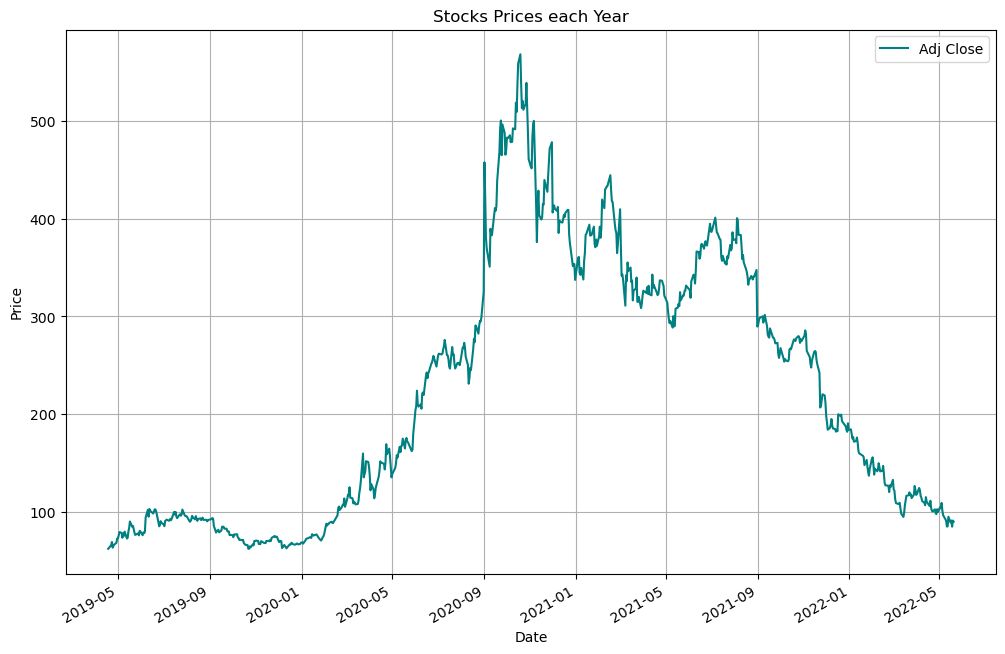

In [7]:
df[['Adj Close','Date']].groupby('Date').mean().plot(figsize=(12,8), color = 'teal', grid = True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stocks Prices each Year')
plt.show()

Lets check out what are the differences between 'Open','High','Low','Close' prices grouping by year

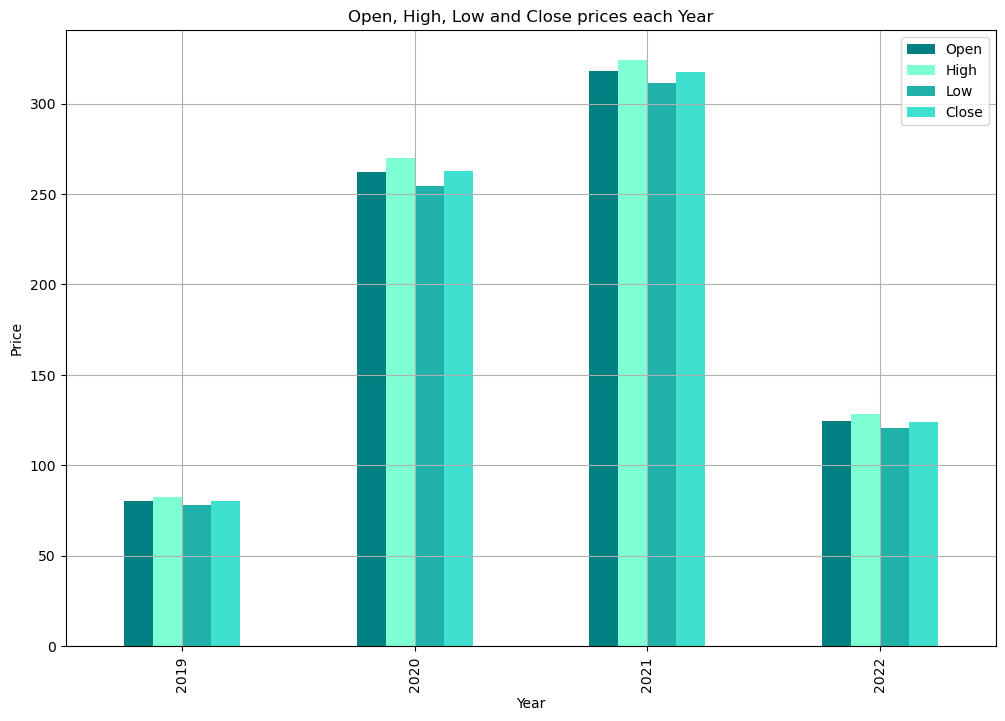

In [8]:
stocks_year = df.groupby(by='year').mean()
stocks_year[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), 
        grid = True, color = ['teal','aquamarine','lightseagreen','turquoise'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Open, High, Low and Close prices each Year')
plt.show()

Pandemic increased stocks prices significantly. Now lets do the same analysis but grouping by months

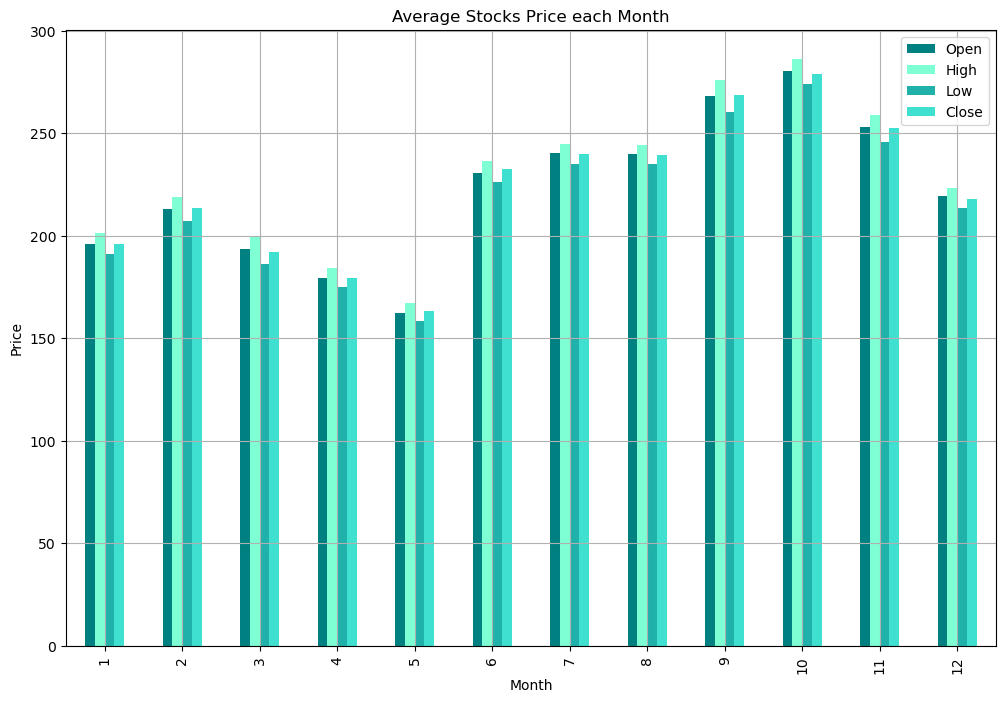

In [9]:
stocks_month = df.groupby(by='month').mean()
stocks_month[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), 
        grid = True, color = ['teal','aquamarine','lightseagreen','turquoise'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Stocks Price each Month')
plt.show()

Looks like semptember - october are the most 'valuable' months. I consider this is due to new semesters at schools and universities and the necessity to purchase software. Now lets go a bit deeper and count the difference between open and close price

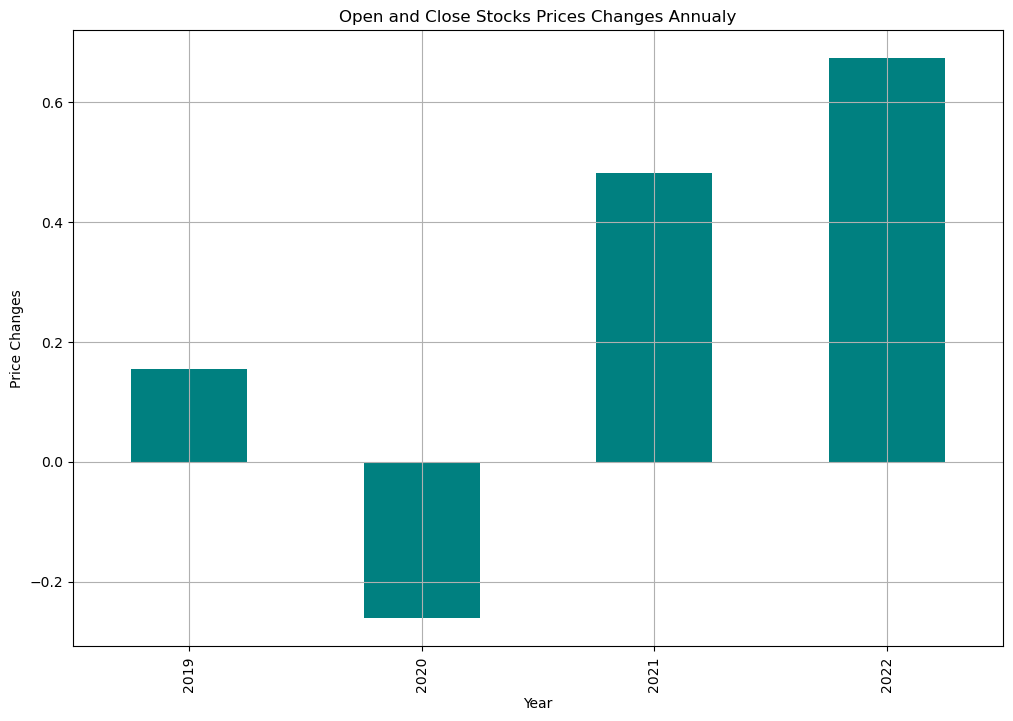

In [10]:
pd.options.mode.chained_assignment = None
open_close = df[['month_year','Open','Close','year']]
open_close['start_end_changes'] = open_close['Open'] - open_close['Close']
open_close.groupby('year').mean()['start_end_changes'].plot(kind = 'bar', grid = True,
    figsize = (12,8), color = 'teal')
plt.xlabel('Year')
plt.ylabel('Price Changes')
plt.title('Open and Close Stocks Prices Changes Annualy')
plt.show()

Looks like the biggest difference between start and final price for a day were in 2020. Lets go deeper to 2020

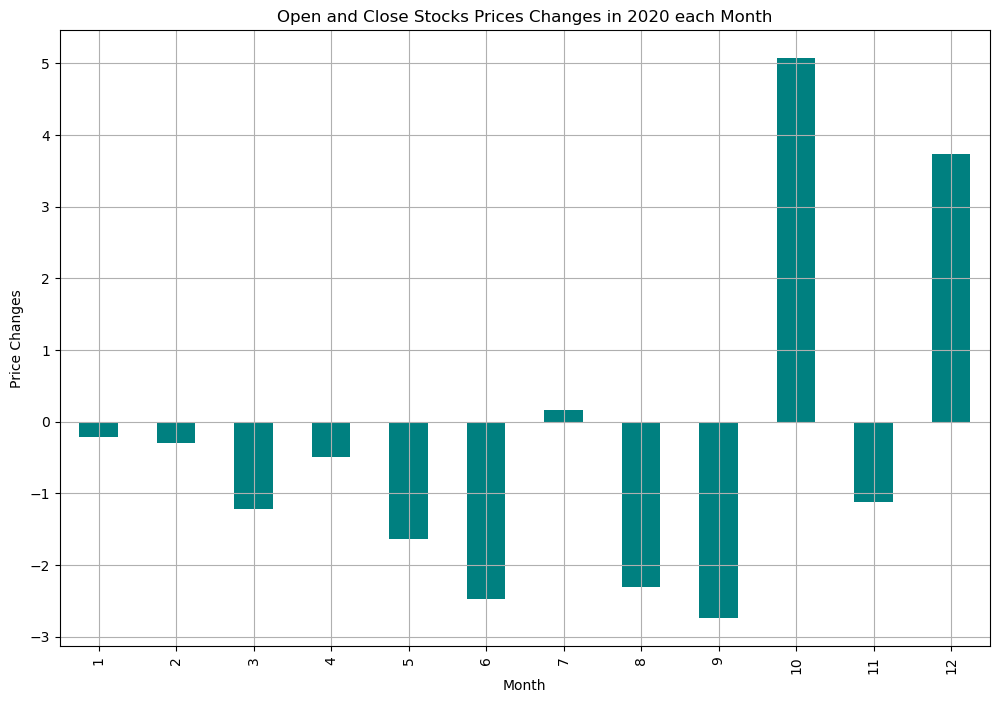

In [11]:
pd.options.mode.chained_assignment = None
open_close_2020 = df[['month','Open','Close','year']]
open_close_2020['start_end_changes'] = open_close_2020['Open'] - open_close_2020['Close']
open_close_2020[open_close_2020['year']==2020].groupby('month').mean()['start_end_changes'].plot(kind = 'bar', grid = True, figsize = (12,8),
        color = 'teal')
plt.xlabel('Month')
plt.ylabel('Price Changes')
plt.title('Open and Close Stocks Prices Changes in 2020 each Month')
plt.show()

2020 was rather unstable. And what do we have with volume...

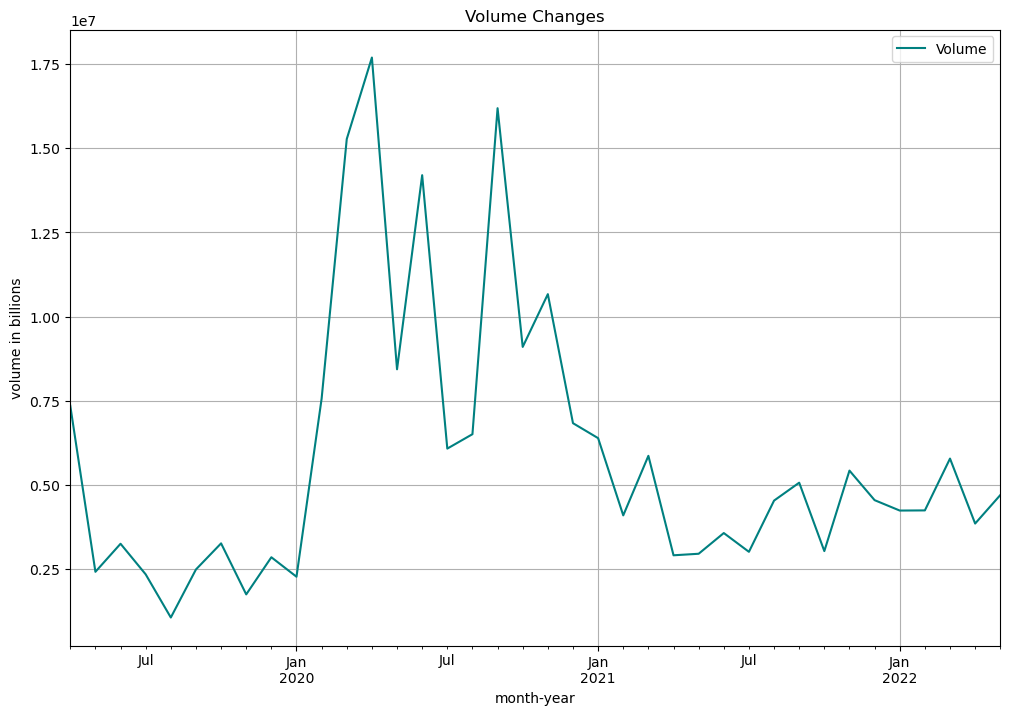

In [12]:
df[['month_year','Volume']].groupby('month_year').mean().plot(figsize = (12,8), color = 'teal', grid = True,)
plt.xlabel('month-year')
plt.ylabel('volume in billions')
plt.title('Volume Changes')
plt.show()

Now lets check out what is the lowest and highest prices grouped by year

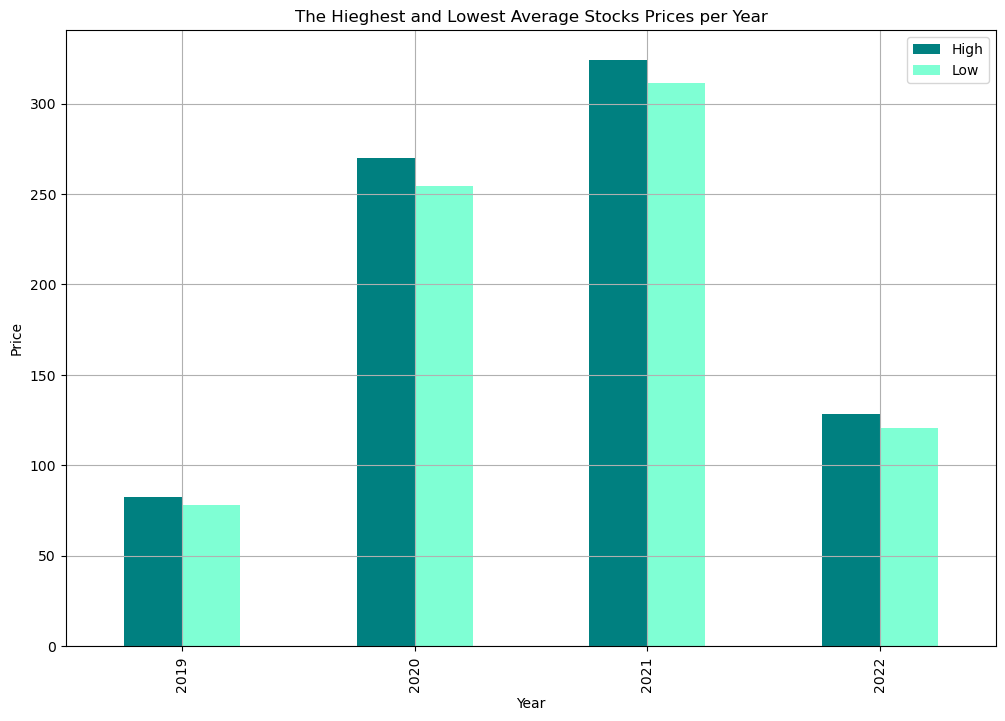

In [13]:
df[['year','High','Low']].groupby('year').mean().plot(kind = 'bar', 
        figsize = (12,8), grid = True, color = ['teal','aquamarine'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('The Hieghest and Lowest Average Stocks Prices per Year')
plt.show()